## Smoothing spike trains with filters

Binning spikes, convolving with gaussian filters, and adding to dataframe

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from data_loader import SessionDataLoader

from spikeplot import raster
from spikes.filters import gaussian_filter, exp_filter
from spikes.binning import bin_spikes

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_loader = SessionDataLoader("YelBlu6903F", 1)

In [4]:
table = data_loader.load_table()

In [37]:
responses = table[(table["stim"] == "285") & (table["unit"] == (29, 1))]
responses

,call_type,spike_times,stim,stim_type,trial,unit
650,DC,"[-1.27082491, -0.3581543, -0.06516719, 0.02555...",285,call,1,"(29, 1)"
651,DC,"[0.01708031, 0.0223641399998, 0.670883889999, ...",285,call,10,"(29, 1)"
652,DC,"[0.0193738899998, 0.67375088, 0.83165169, 1.17...",285,call,2,"(29, 1)"
653,DC,"[0.01937413, 0.67198968, 0.67657733, 0.7141375...",285,call,3,"(29, 1)"
654,DC,"[0.0168755100001, 0.01835013, 0.0194151400001,...",285,call,4,"(29, 1)"
655,DC,"[-1.07110405, 0.0174488999999, 0.71331835, 1.1...",285,call,5,"(29, 1)"
656,DC,"[0.02559995, 1.14593792, 1.14733052]",285,call,6,"(29, 1)"
657,DC,"[0.0189645300002, 0.0201113200001, 0.022978540...",285,call,7,"(29, 1)"
658,DC,"[0.0198247399999, 0.0221185699997, 0.67264533,...",285,call,8,"(29, 1)"
659,DC,"[0.0196607099997, 0.0211763399993, 0.675143719...",285,call,9,"(29, 1)"


In [38]:
t_arr, spikes = bin_spikes(responses["spike_times"])
spikes_filtered = gaussian_filter(spikes, 30.0)

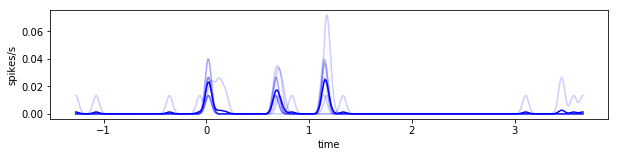

In [46]:
plt.figure(figsize=(10, 2))
plt.plot(t_arr, spikes_filtered.T, color="blue", alpha=0.2)
plt.plot(t_arr, np.mean(spikes_filtered, axis=0), color="blue")
plt.xlabel("time")
plt.ylabel("spikes/s")
plt.show()

In [142]:
t_arr, spikes = bin_spikes(table["spike_times"], min_time=0.0, max_time=0.6)
spikes_filtered = gaussian_filter(spikes, 5.0)

table["binned_spikes"] = spikes.tolist()
table["psth"] = spikes_filtered.tolist()

Lets lets compare a neuron's response to distance calls to aggressive calls

In [143]:
unit_table = table[table["unit"] == (29, 1)]
dc_call_table = unit_table[(unit_table["call_type"] == "DC")]
ag_call_table = unit_table[(unit_table["call_type"] == "Ag")]
distance_call_responses = np.array(dc_call_table["psth"].tolist())
aggressive_call_responses = np.array(ag_call_table["psth"].tolist())

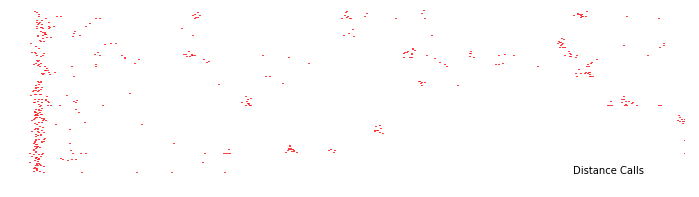

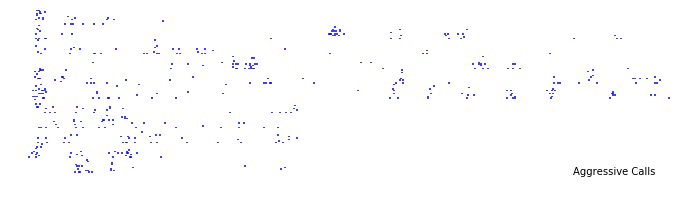

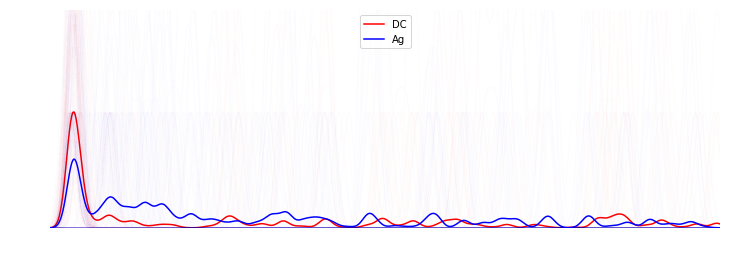

In [144]:
plt.figure(figsize=(12, 3))
raster.plot(dc_call_table["spike_times"], 0.0, 0.6, color="red")
plt.axis("off")
plt.text(0.5, 0.0, "Distance Calls")

plt.figure(figsize=(12, 3))
raster.plot(ag_call_table["spike_times"], 0.0, 0.6, color="blue")
plt.axis("off")
plt.text(0.5, 0.0, "Aggressive Calls")


plt.figure(figsize=(12, 4))
plt.plot(t_arr, distance_call_responses.T, color="red", alpha=0.01)
plt.plot(t_arr, np.mean(distance_call_responses, axis=0), color="red", label="DC")
plt.plot(t_arr, aggressive_call_responses.T, color="blue", alpha=0.01)
plt.plot(t_arr, np.mean(aggressive_call_responses, axis=0), color="blue", label="Ag")
plt.xlabel("time")
plt.xlim(0, 0.6)
plt.ylim(0.0, 0.15)
plt.ylabel("spikes/s")
plt.legend()
plt.axis("off")

plt.show()